In [45]:
#from ensemble import RegressionEnsemble, MixedRegressionEnsemble, BootstrapEnsemble, ShuffleEnsemble
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Toy dataset
from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [46]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
forest_regression = ensemble.RegressionEnsemble()
forest_regression.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_forest,std_forest = forest_regression.predict(X_test,std=True)

# Plot the results
#plt.figure()
#plt.scatter(X, y, s=20, edgecolor="black",
#            c="darkorange", label="data")
#plt.plot(X_test, y_forest, color="cornflowerblue",
#        label="max_depth=2", linewidth=2)
#plt.plot(X_test,std_forest,color="black")

#plt.xlabel("data")
#plt.ylabel("target")
#plt.title("Decision Tree Regression")
#plt.legend()
#plt.show()

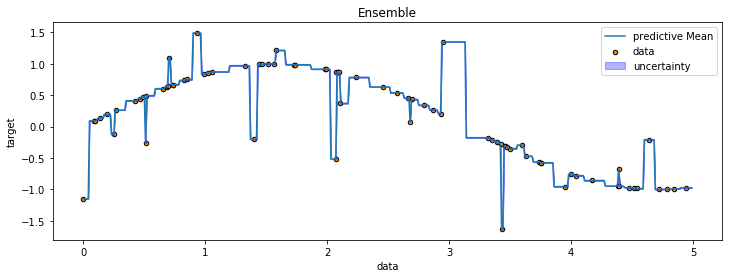

In [47]:
forest_regression.scatterplot(X_test,X=X,y=y)

# Mixed Models

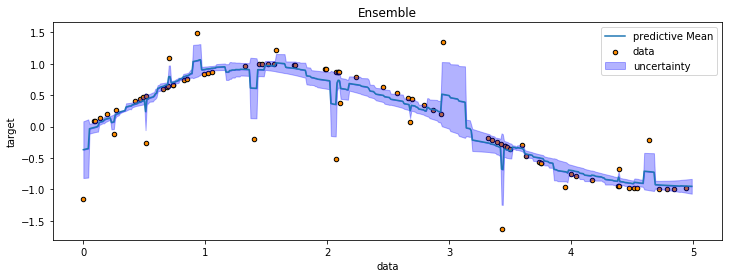

In [48]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])
mixed_regression = mixed_ensemble#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_regression.predict(X_test,std=True)

mixed_ensemble.scatterplot(X_test,X=X,y=y)

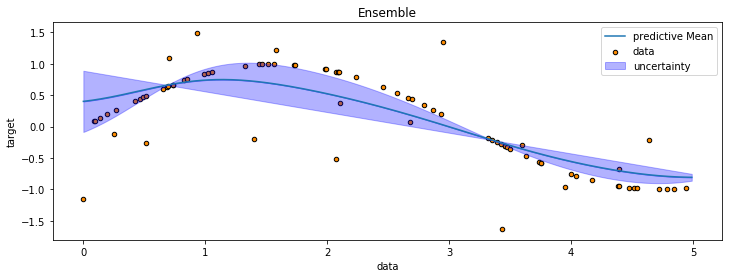

In [49]:
mixed_ensemble_2 = ensemble.MixedRegressionEnsemble(models = [#DecisionTreeRegressor(),
                                                            LinearRegression(),
                                                            #KNeighborsRegressor(),
                                                            #MLPRegressor(max_iter=1000),
                                                           SVR()
                                                             ])
mixed_regression = mixed_ensemble_2#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_ensemble_2.predict(X_test,std=True)

mixed_ensemble_2.scatterplot(X_test,X=X,y=y)

# Bootstrap

In [50]:
bootstrap_ensemble = ensemble.BootstrapEnsemble()

In [51]:
bootstrap_regression = bootstrap_ensemble#DecisionTreeRegressor(max_depth=5)
bootstrap_regression.fit(X, y)

# Predict
y_bootstrap,std_bootstrap = bootstrap_regression.predict(X_test,std=True)



80 80


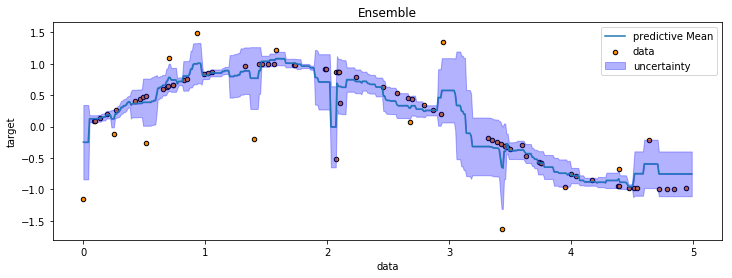

In [52]:
bootstrap_ensemble.scatterplot(X_test,X=X,y=y)

# Different Data shuffling

In [53]:
shuffle_ensemble = ensemble.ShuffleEnsemble()

In [54]:
shuffle_regression = shuffle_ensemble#DecisionTreeRegressor(max_depth=5)
shuffle_regression.fit(X, y)

# Predict
y_shuffle,std_shuffle = shuffle_regression.predict(X_test,std=True)



80 80


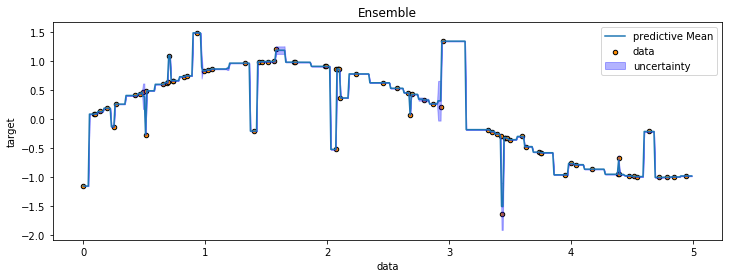

In [55]:
shuffle_ensemble.scatterplot(X_test,X=X,y=y)

# Boston Housing Prices ([:,5 is rooms per venue])

In [56]:
boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## TreeEnsemble

In [57]:
treeEnsemble = ensemble.RegressionEnsemble(10,DecisionTreeRegressor)

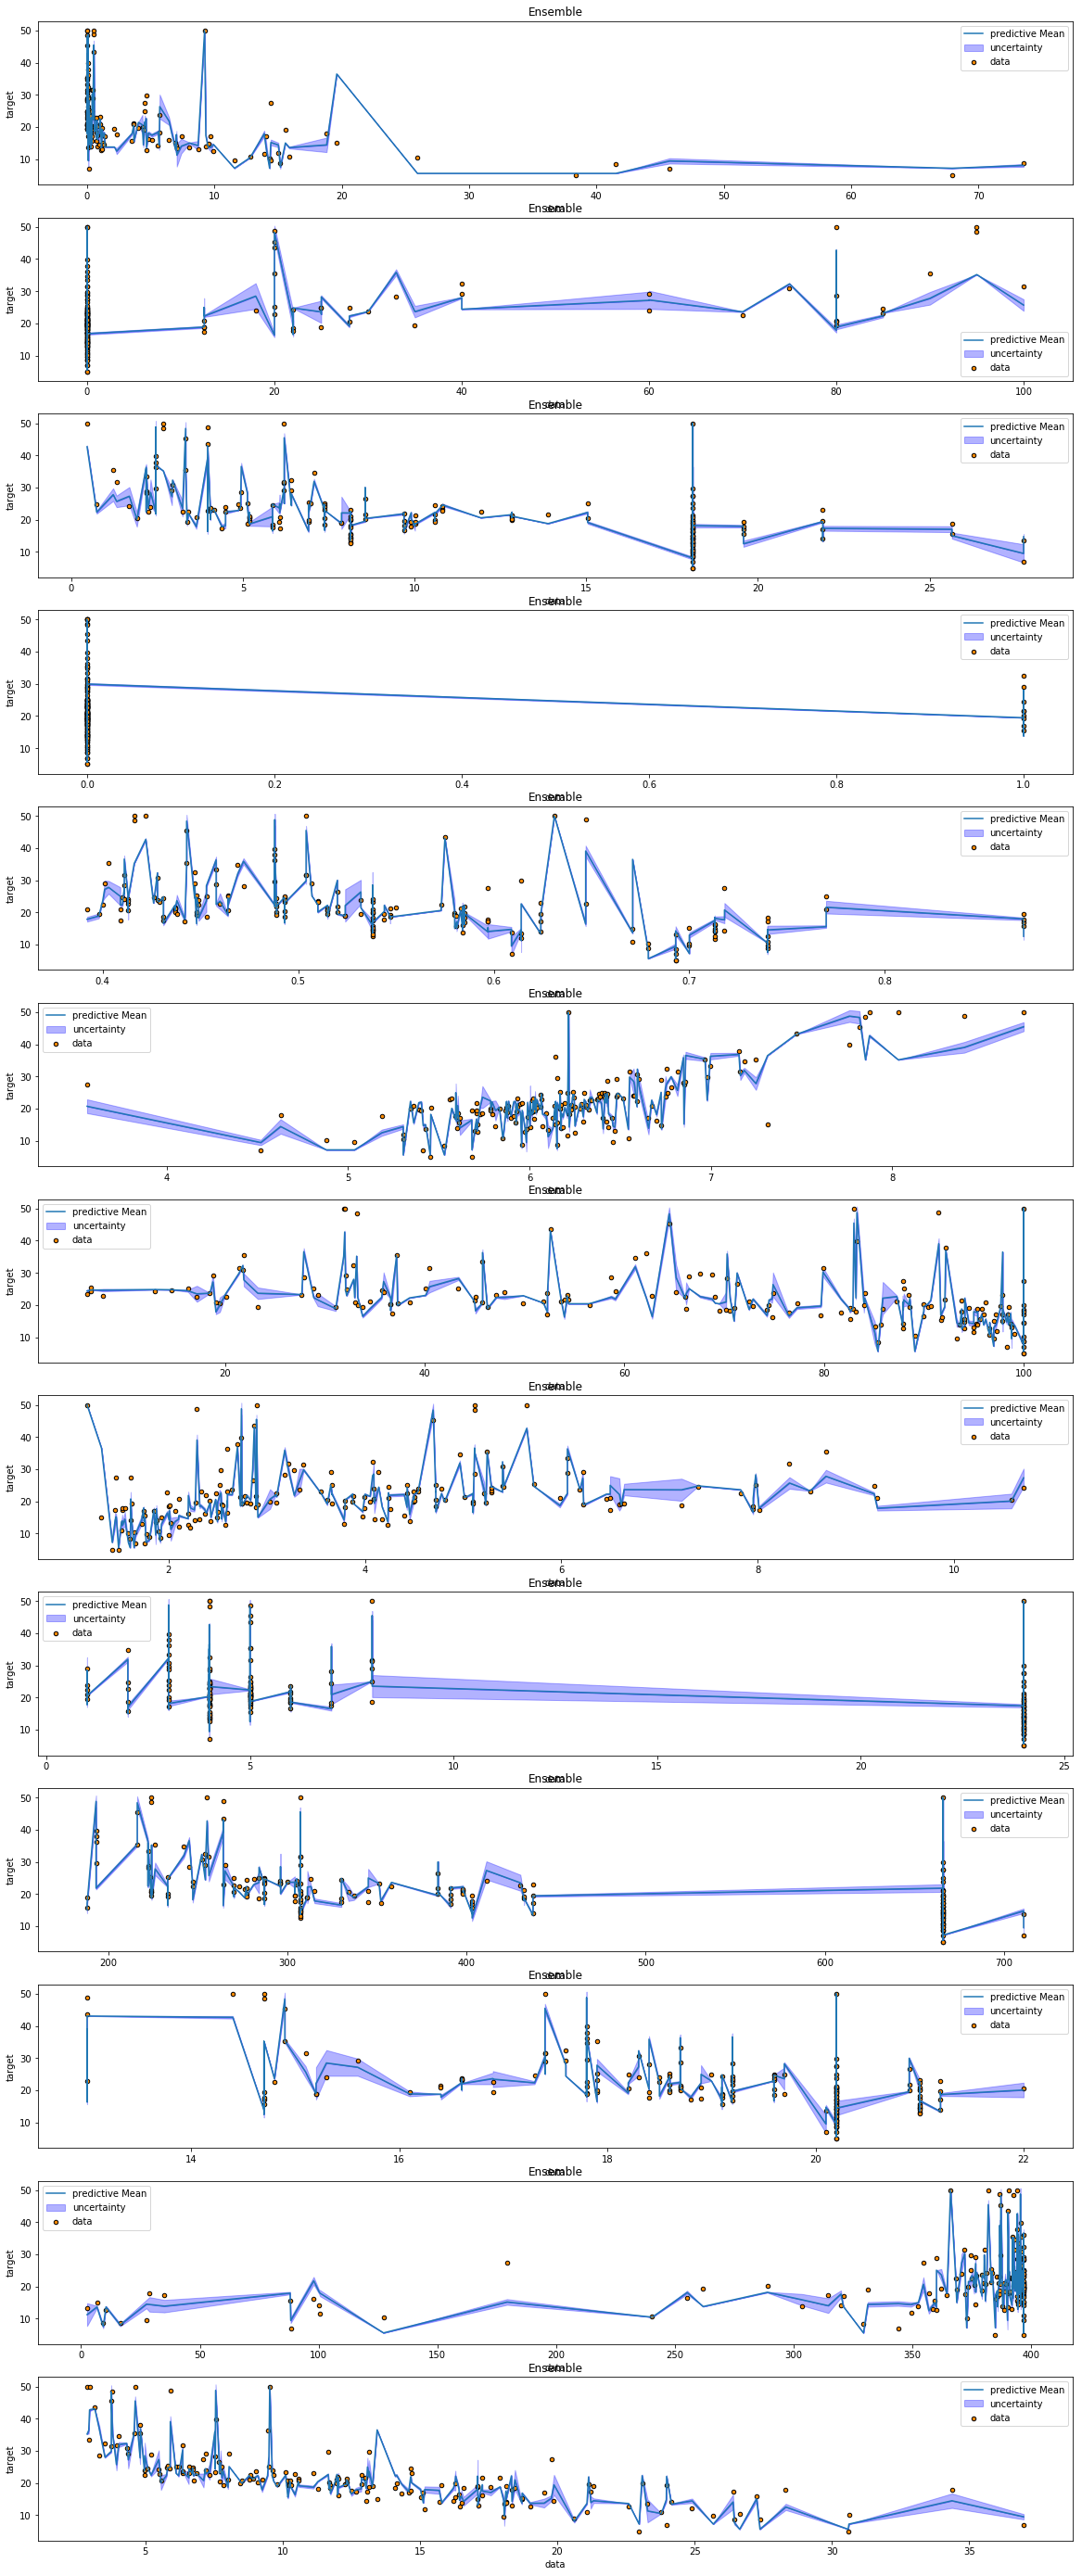

In [58]:
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test)

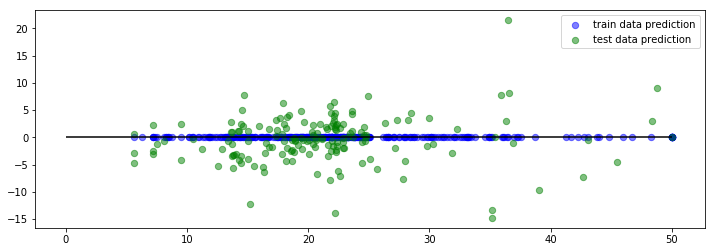

In [59]:
treeEnsemble.plot_residuals(X_train,y_train,X_test,y_test)

In [60]:
treeEnsemble.self_evaluate(X_test,y_test)

{'correlation between error and variance': (-0.0037210455722983269,
  0.96193501467817177),
 'coverage probability': 0.11976047904191617,
 'error normalcy': NormaltestResult(statistic=245.24166380214339, pvalue=5.5776253461400767e-54),
 'predictive power of y on the error': (0.87219104981151352,
  4.086084758277716e-53),
 'predictive power of y on the uncertainty': (0.87219104981151352,
  4.086084758277716e-53),
 'rsme': 4.2994870881951588}

## Mixed Ensemble

In [61]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR()])

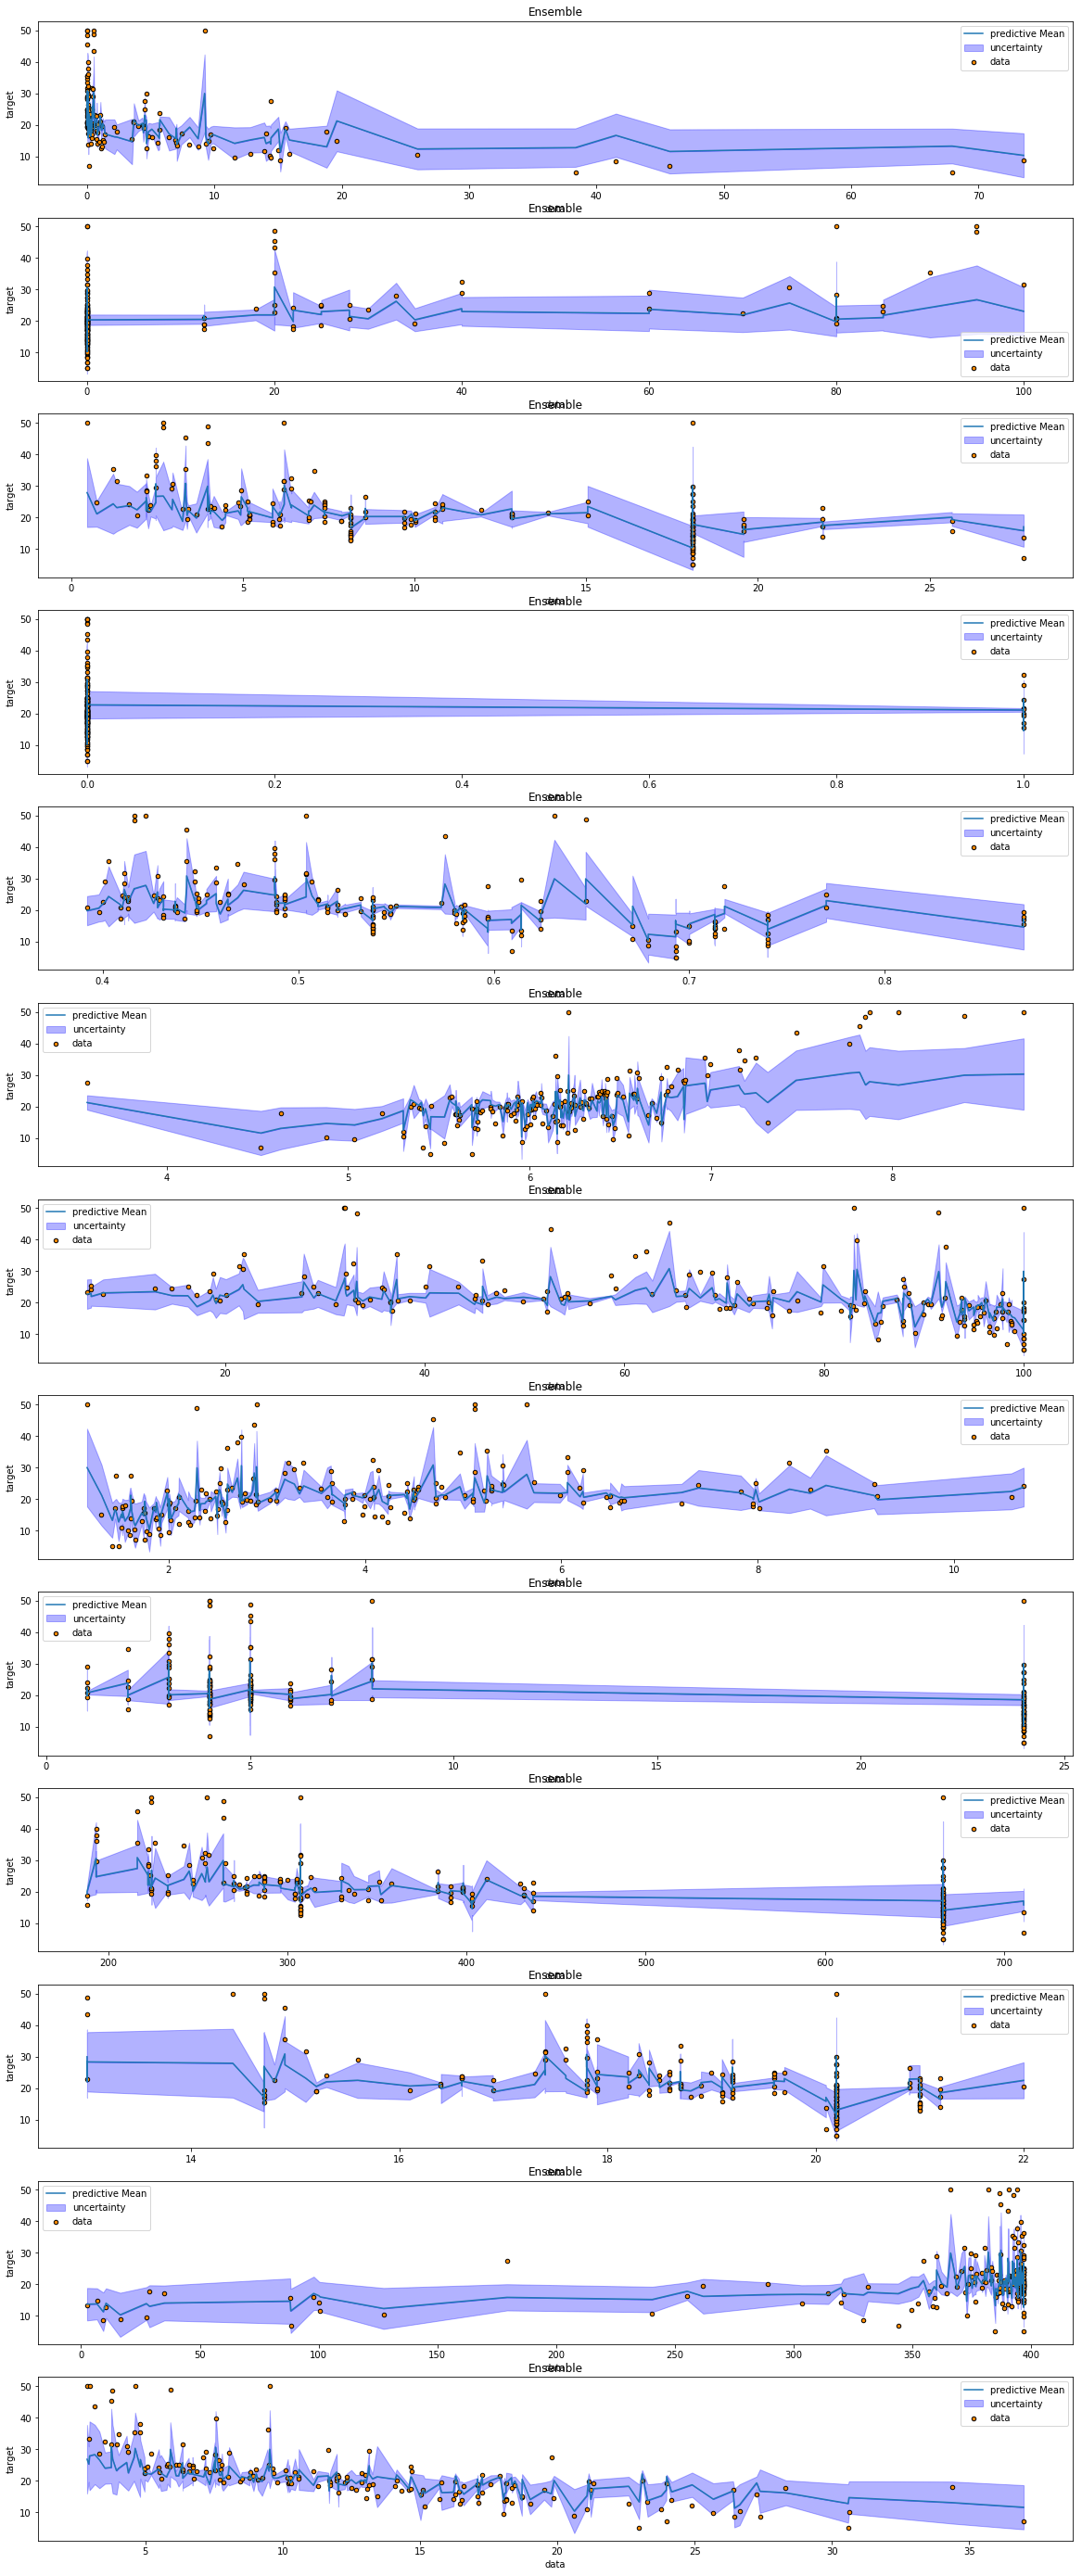

In [62]:
mixed_ensemble.fit(X_train,y_train)
y_hat,std  = mixed_ensemble.predict(X_test,std=True)
mixed_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

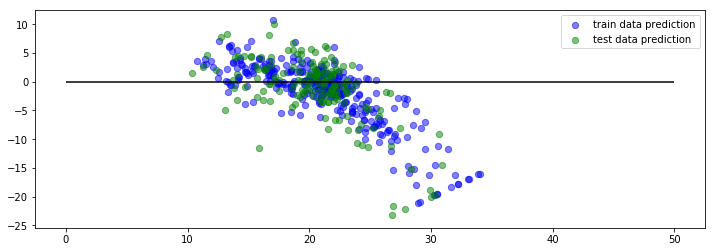

In [63]:
mixed_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [64]:
mixed_ensemble.self_evaluate(X_test,y_test)

{'correlation between error and variance': (0.63727810801764218,
  2.0626495843604353e-20),
 'coverage probability': 0.562874251497006,
 'error normalcy': NormaltestResult(statistic=171.59209756736638, pvalue=5.4859196722452687e-38),
 'predictive power of y on the error': (0.86042310032390712,
  3.5237522759827074e-50),
 'predictive power of y on the uncertainty': (0.86042310032390712,
  3.5237522759827074e-50),
 'rsme': 5.8570297194939078}

## Bootstrap

In [65]:
bootstrap_ensemble = ensemble.BootstrapEnsemble()


4407 339


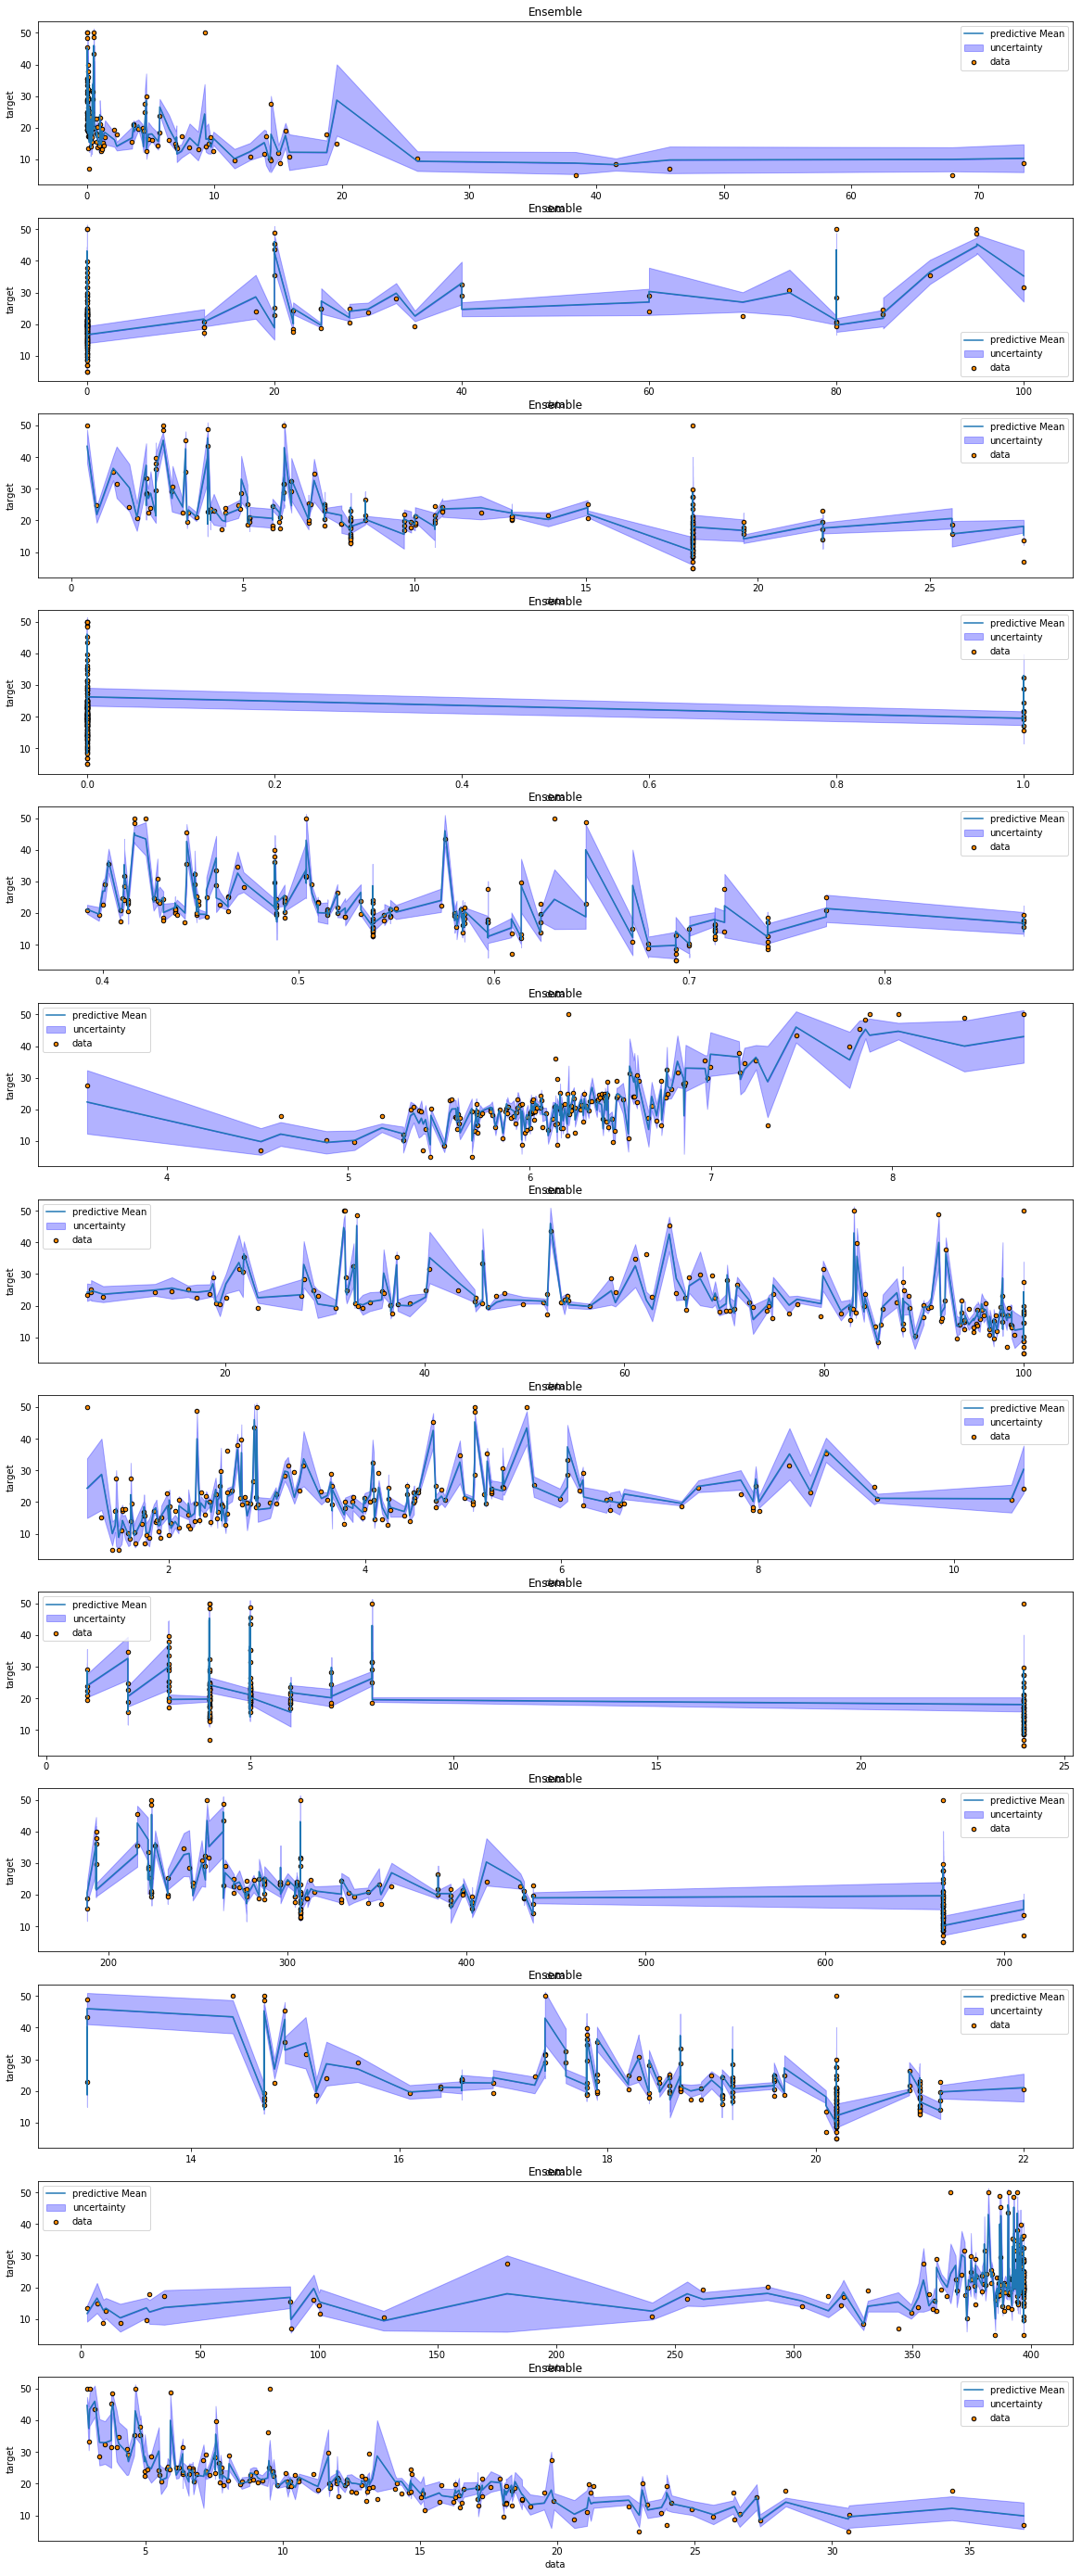

In [66]:
bootstrap_ensemble.fit(X_train,y_train)
y_hat,std  = bootstrap_ensemble.predict(X_test,std=True)
bootstrap_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

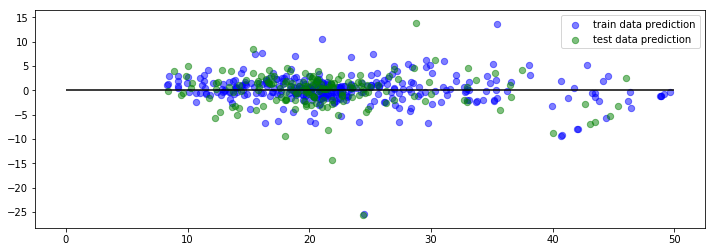

In [67]:
bootstrap_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [68]:
bootstrap_ensemble.self_evaluate(X_test,y_test)

{'correlation between error and variance': (0.37001201174807002,
  8.5882813276624011e-07),
 'coverage probability': 0.7005988023952096,
 'error normalcy': NormaltestResult(statistic=316.31467697286433, pvalue=2.0565563930234682e-69),
 'predictive power of y on the error': (0.90255314109589146,
  2.851742156119681e-62),
 'predictive power of y on the uncertainty': (0.90255314109589146,
  2.851742156119681e-62),
 'rsme': 3.7810901225665141}

## Different Data Shuffling

In [69]:
shuffle_ensemble = ensemble.ShuffleEnsemble()

4407 339


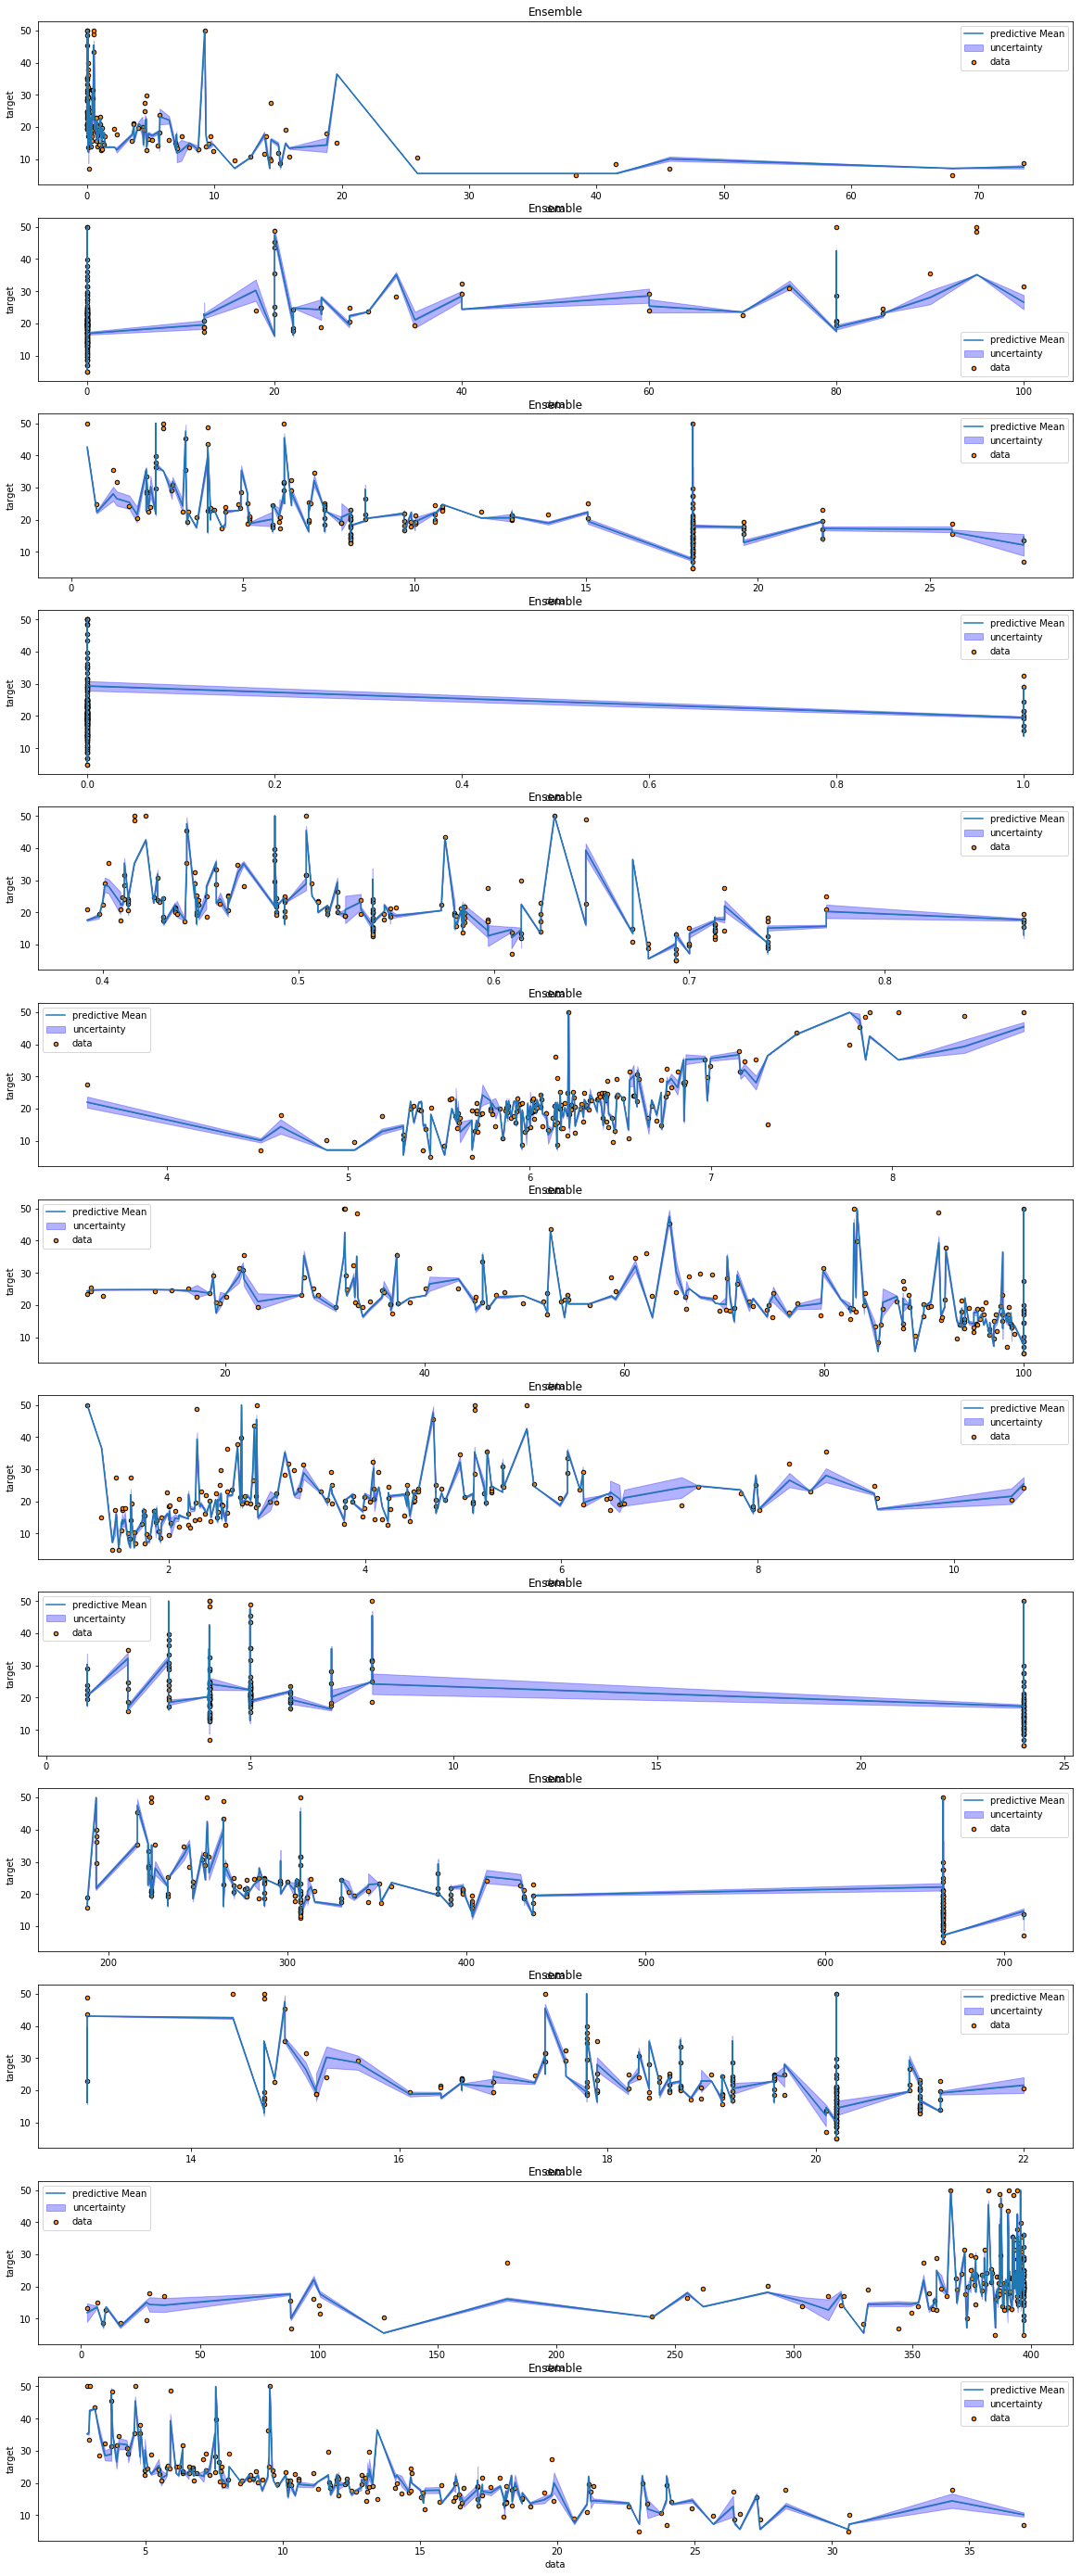

In [70]:
shuffle_ensemble.fit(X_train,y_train)
y_hat,std  = shuffle_ensemble.predict(X_test,std=True)
shuffle_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

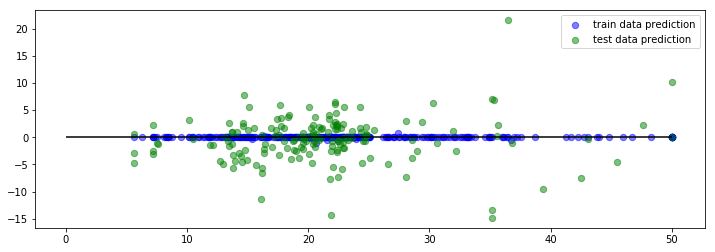

In [71]:
shuffle_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [72]:
shuffle_ensemble.self_evaluate(X_test,y_test)

{'correlation between error and variance': (-0.057116456679016346,
  0.46345950033794214),
 'coverage probability': 0.17365269461077845,
 'error normalcy': NormaltestResult(statistic=246.87505741732116, pvalue=2.464690675524435e-54),
 'predictive power of y on the error': (0.87651767997973618,
  2.8706973134623071e-54),
 'predictive power of y on the uncertainty': (0.87651767997973618,
  2.8706973134623071e-54),
 'rsme': 4.2226382336987633}